# Математика для Data Science.

# Финальный тест.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.misc import derivative
from scipy.optimize import minimize

from sklearn.decomposition import TruncatedSVD

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [20]:
def cosine_similarity ( a, b ):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    return np.dot( a, b ) / ( aLength * bLength )

In [21]:
pairs = []
for j in range(len(raitings)):
    next_user_stats=raitings[j]
    cos_max=0
    ind=-1
    for i in range(len(raitings)):
        if i == j: continue
        if(cosine_similarity( next_user_stats, raitings[i] ) > cos_max):
            cos_max=cosine_similarity( next_user_stats, raitings[i] )
            ind=i
    pairs.append([j, ind])
print(pairs)

[[0, 8], [1, 4], [2, 9], [3, 9], [4, 8], [5, 9], [6, 3], [7, 5], [8, 0], [9, 2]]


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [22]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(raitings)
X_reduced

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

Тангенс представлен степенной функцией, поэтому берем производную по правилу $(X^p)'= pX^p-^1$ ,

а затем умножаем на производную тангенса: $F'(x) = tg^2(x) = 2tg(x) / (tgx)' = 2tg(x) / cos^2x $

x0=1


$F'(x0) = tg^2(sin(x) + cos(2x+3)) = 2tg(sin(x) + cos(2x+3))/cos^2(sin(x) + cos(2x+3)) = 2tg (sin1 + cos6) / cos^2(sin1 + cos6) $

In [30]:
from scipy.optimize import approx_fprime

def func(x, c0):
    return np.tan(np.sin(c0*x[0]) + np.cos(2*(c0*x[0]) + 3))**2

In [31]:
x = np.ones(1)
c0 = (1)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0)

array([55.3859244])

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [39]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [33]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [34]:
x = [0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]

In [35]:
fx = [  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092]

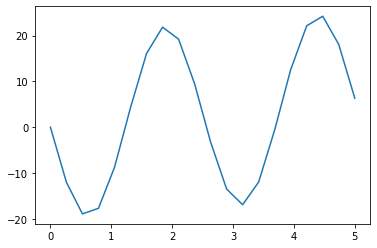

In [36]:
plt.plot(x, fx)
plt.show()

In [37]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Optimization terminated successfully.
         Current function value: 244.490075
         Iterations: 108
         Function evaluations: 207
parametr a,b: [2.75787609 9.45434802]


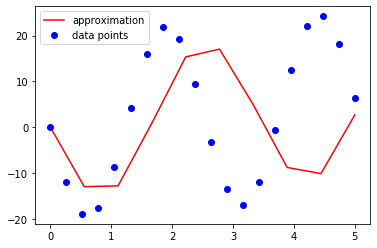

In [43]:
def f1(params, x, fx):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

x=np.array(x)
res = minimize(f1, [2.5, 9], args=(x, fx), method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
print('parametr a,b:',res.x)
xx1=np.linspace(x.min(),x.max(),10)
yy1=f(xx1,res.x[0], res.x[1])
fig, ax = plt.subplots ()
plt.plot(xx1, yy1,'r-',label='approximation')
plt.plot(x, fx,'bo',label='data points')
plt.legend ()
plt.show()

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [45]:
from scipy.stats import rv_discrete
import seaborn as sns

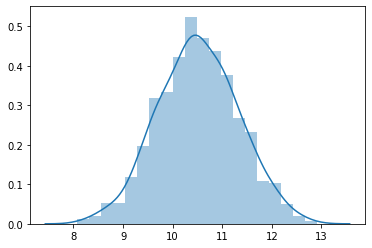

In [46]:
val = [i+1 for i in range(20)]
probabilities = [1/20. for i in range(20)]
mas_val = []
for i in range(1000):
    distrib = rv_discrete(values=(val, probabilities))
    a = distrib.rvs(size=50)
    mas_val.append(np.mean(a))
sns_plot = sns.distplot(mas_val, bins=20)
fig = sns_plot.get_figure()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [47]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


Функция linalg.eig() вычисляет собственные числа (значения) и собственные векторы квадратной матрицы.

Собственное число квадратной матрицы a и ее собственный вектор связаны равенством np.dot(a, v) = w*v.

Если у матрицы несколько собственных чисел и соответственно несколько собственных векторов, то данная функция возвращает массив собственных значений и массив собственных векторов (необязательно упорядоченных). В этом случае выполняются равенства np.dot(a[:,:], v[:,i]) = w[i] * v[:,i], для всех i из интервала [0, ..., M - 1], где M - размер матрицы.

w - массив NumPy
Собственные числа входной матрицы.

v - массив NumPy
Собственные векторы входной матрицы.

In [53]:
w, v = np.linalg.eig((m))
for i in range(len(w)):
    print("Собственное число: " + str(w[i]))
    print("Собственный вектор: " + str(v[i]))

Собственное число: 3.0000000000000004
Собственный вектор: [ 0.89442719 -0.89442719]
Собственное число: -0.9999999999999996
Собственный вектор: [0.4472136 0.4472136]
